In [172]:
__precompile__() # Se precompila el paquete.

module herramientas

export metodo_newton

"""documentación del método de Newton"""

function metodo_newton(F,df,valorinicial) #Se define una función que calcule las raíces 
    #usando el método de Newton que tome como entradas a una función cualquiera, la 
    #derivada y el valor inicial.
    x=valorinicial
    for i in 1:100
    x=x-F(x)/df(x);
    end
   return x #Se regresa el valor de la raiz.
end

export metodo_newton2

"""documentación del segundo método de Newton"""

function metodo_newton2(F,xi,h,error=1e-8) #Se define otra función que calcule las raices 
    #usando el método de Newton nuevamente, pero ahora sólo tomando las raices hasta 
    #cierto valor denotado por "error".
    df=F(xi+h)-F(xi)
    d=error+1
    while error<d
        xi=xi-F(xi)/(df)
        d=(F(xi)^2)^(1/2)
    end
    return xi #Regresa la raiz.
end

export metodo_newton3

"""documentación del tercer método de Newton"""

function metodo_newton3(F,xa,xb,h,error=1e-10) #Se crea una rutina donde en lugar de 
    #tomar una sóla condición inicial, reciba un rango de condiciones iniciales.
    raices=[] #Se define el vector raices.
    for i in linspace(xa,xb,200) #Se realiza la iteración 200 veces en el intervalo inicial.
        
        d=error+1
        while error<d
            i=i-F(i)/(F(i+h)-F(i))
            d=(F(i)^2)^(1/2)
        end
     
        push!(raices,i) #Guarda las raices en el vector definido raices.
    end
    return raices #Devuelve el vector.
end

export metodo_trapecio

"""documentación del método del Trapecio"""

function metodo_trapecio(f,a,b,n) #Se define una función que calcule la integral de una 
    #función dada usando el método del trapecio que tome como entradas a la función, el 
    #intervalo de integración, y el número de particiones del intervalo.
    x=a
    I=0
    while x<b
        x=x+((b-a)/n)
        I += (b-a)*(f(x)+f(x+(b-a)/n))/2n
    end
   return I #Se regresa el valor de la integral.
end

export metodo_rectangulo

"""documentación del método del Rectángulo"""


function metodo_rectangulo(F,a,b,n) #Se define una función que calcule la integral de 
    #una función dada usando el método del rectángulo que tome como entradas a la función, 
    #el intervalo de integración, y el número de particiones del intervalo.
    x=a
    I=0
    while x<b
        x=x+((b-a)/n)
        I += ((b-a)/n)*F(x+((b-a)/2n))
    end
   return I #Se regresa el valor de la integral.
end

export metodo_simpson

"""documentación del método de Simpson"""

function metodo_simpson(F,a,b,n) #Se define una función que calcule la integral de una función 
    #dada usando el método de Simpson que tome como entradas a la función, el intervalo de 
    #integración, y el número de particiones del intervalo.
    x = a
    I = 0
    while x < b
        x = x + ((b-a) / n)
        I += (b - a) * (F(x) + 4 * F(x + (b-a) / 2n) + F(x + (b-a)/n)) / 6n
    end
   return I #Se regresa el valor de la integral.
end

export metodo_euler

"""documentación del método de Euler vectorial"""

function metodo_euler_vec(f,list,x0) #Se crea una función que implementa el método de Euler vectorial. 
    #Dicha función toma como entradas la función, una lista y el valor inicial x0.
     x = x0 #Se asigna a x el valor inicial x0.
     h = list[2]-list[1] #Se escribe el paso de h.
     listx = [] #Se crea un vector vacío.
     for i in 2:length(list)
        t = i*h #Se calculan los valores de t.
        x = x + f(x,t)*h #Se realiza la operación del método de Euler.
        push!(listx,x) #Se guarda en listx los valores de x que se obtienen del método de Euler.
     end
     return listx #Se regresa la lista de x.
end

export metodo_implicito_euler

"""documentación del método implícito de Euler"""

function metodo_implicito_euler(f,x0,t0,tf,h) #Se crea una función que permite, mediante el método
    # implícito de Euler, obtener la solución aproximada de una ecuación diferencial. Dicha función 
    #toma como entradas la función que aparece en tal ecuación, la condición inicial, el valor inicial 
    #de t, el valor final de t, y el valor de h.
    listt = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la separación entre  
    #sus valores está dada por el valor de h.
    listx = [] #Se crea un vector en donde se guardan los valores xk del método implícito de Euler.
    xk = x0
    
    for i in t0:h:tf
        push!(listt,i) 
    end

    for j in 1:length(listt) #Se realiza un for donde le da un intervalo a j cuyo tamaño es el de 
     #la lista de t.
        push!(listx,xk) #Se guardan los valores xk en listx.
        g = - f(listt[j], xk)*h #Se define una función g que se usará en el método implícito.
        dg = 1 - f(listt[j], xk + h) + f(listt[j],xk) #Se escribe la derivada de la función g.
        xk = xk - g/dg #Se realiza la operación que determina los valores xk
    end
    
    return listt, listx #Se regresan la listas listt y listx.
end

export metodo_explicito_regla_punto_medio

"""documentación del método explícito de Euler (regla del punto medio)"""

function metodo_explicito_regla_punto_medio(f,x0,t0,tf,h) #Se crea una función que permite, 
    #mediante el método del punto medio, obtener la solución aproximada de una ecuación 
    #diferencial. Las entradas de esta función son las mismas que aquellas de la función 
    #para el método implícito de Euler.
    listt_medio = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la 
    #separación entre sus valores está dada por el valor de h.
        for i in t0:h/2:tf
            push!(listt_medio,i)
        end
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de la regla 
    #del punto medio.
    xk = x0
        for j in 1:length(listt_medio) #Se realiza un for donde se le asigna un intervalo a j 
        #cuyo tamaño es la mitad del tamaño de la lista t.
        if iseven(j) 
            push!(listx,xk) #Se guarda el valor de j en la lista x.
            xk = xk + f(listt_medio[j+1],xk+ f(xk,listt_medio[j]*h/2))*h #Se crea una función 
            #que se requiere en este método.
        end
        
        end
    push!(listx,xk)
        listt = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la 
    #separación entre sus valores está dada por el valor de h.
        for i in t0:h:tf
            push!(listt,i)
        end
    return listt, listx #Se regresan la listas listt y listx.
end

export metodo_runge_kutta_vec

"""documentación del método de Runge-Kutta de orden 4 vectorial"""

function metodo_runge_kutta_vec(f,list,x0) #Se crea una función que permite, mediante el
    #método de Runge-Kutta de orden 4 vectorial, obtener la solución aproximada de una 
    #ecuación diferencial. Las entradas de esta función son la función, el valor inicial x0 
    #y una lista.
    
    x = x0
    h = list[2]-list[1] #Se calcula el tamaño del paso.
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de Runge-Kutta de 
    #orden 4.
    push!(listx,x) #Se  guardan la los valores de x en listx.
    
        for i in 2:length(list) #Se realiza un for donde se da un intervalo a i cuyo tamaño es el
        #de la lista t.
            t = i*h
            #Se definen funciones necesarias para implementar el método de Runge-Kutta de orden 4.
            k1 = f(x,t)
            k2 = f(x + ((h/2) * k1),t + h/2)
            k3 = f(x + ((h/2) * k2),t + h/2)
            k4 = f(x + h * k3,t + h)
            x = x + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)#Se realiza la operación que determina los 
            #valores xk.
            push!(listx,x) #Se guarda el valor de xk en la lista x.
        end
     return listx #Se regresa la lista listx.
end

end

herramientas

In [173]:
f(x) = x^2

f (generic function with 2 methods)

#### Se realiza una comprobación del funcionamiento del método de Newton

In [174]:
herramientas.metodo_newton(sin,cos,2)

3.141592653589793

In [175]:
?herramientas.metodo_newton

documentación del método de Newton


In [176]:
import herramientas.jl

In [150]:
herramientas.metodo_newton(sin,cos,2)

3.141592653589793

#### Se realiza una comprobación del funcionamiento del segundo método de Newton

In [151]:
herramientas.metodo_newton2(sin,2,0.9)

3.141592662224961

In [152]:
?herramientas.metodo_newton2

documentación del segundo método de Newton


#### Se realiza una comprobación del funcionamiento del tercer método de Newton

In [153]:
herramientas.metodo_newton3(sin,1.0,3.0,0.9)

200-element Array{Any,1}:
    -6.28319
    -9.42478
    -9.42478
    -9.42478
     3.14159
   -12.5664 
   -15.708  
   -18.8496 
   -84.823  
   -31.4159 
   -53.4071 
  -144.513  
 -5353.27   
     ⋮      
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159

In [154]:
?herramientas.metodo_newton3

documentación del tercer método de Newton


#### Se realiza una comprobación del funcionamiento del método del Trapecio

In [155]:
herramientas.metodo_trapecio(f,1,3,1000)

8.70071201999971

In [156]:
?herramientas.metodo_trapecio

documentación del método del Trapecio


#### Se realiza una comprobación del funcionamiento del método del Rectángulo

In [157]:
herramientas.metodo_rectangulo(f,1,3,6000)

8.672334537119355

In [158]:
?herramientas.metodo_rectangulo

documentación del método del Rectángulo


#### Se realiza una comprobación del funcionamiento del método de Simpson

In [159]:
herramientas.metodo_simpson(f,1,5,10000)

41.35293637347601

In [99]:
?herramientas.metodo_simpson

documentación del método de Simpson


#### Se realiza una comprobación del funcionamiento del método de Euler vectorial

In [121]:
h(x,t) = [x[2],-x[1]-x[2]] #Se define la función asociada al sistema de ecuaciones 
#del oscilador armónico amortiguado.
list = 0:0.01:500 #Se crea una lista particular para realizar el método de Euler.
herramientas.metodo_euler_vec(f,list,[1,0]) #Se crea un vector particular para realizar el método de 
#Euler,con condiciones iniciales x(0)=1, x'(0)=1.

50000-element Array{Any,1}:
 [1.0,-0.01]                                      
 [0.9999,-0.0199]                                 
 [0.9997010000000001,-0.0297]                     
 [0.9994040000000001,-0.03940001]                 
 [0.9990099999000001,-0.0490000499]               
 [0.998519999401,-0.05850014940000001]            
 [0.997934997907,-0.06790034790001001]            
 [0.997255994428,-0.07720069440007991]            
 [0.9964839874839991,-0.08640124740035912]        
 [0.9956199750099956,-0.09550207480119552]        
 [0.9946649542619836,-0.10450325380328351]        
 [0.9936199217239509,-0.11340487080787051]        
 [0.9924858730158722,-0.12220702131703132]        
 ⋮                                                
 [6.061623120076256e-109,-1.154965127522583e-108] 
 [5.946126607323998e-109,-1.1494770993674333e-108]
 [5.831178897387254e-109,-1.143928454981083e-108] 
 [5.716786051889146e-109,-1.1383203493286595e-108]
 [5.60295401695628e-109,-1.132653931887262e-108]  
 [5

In [23]:
using PyPlot

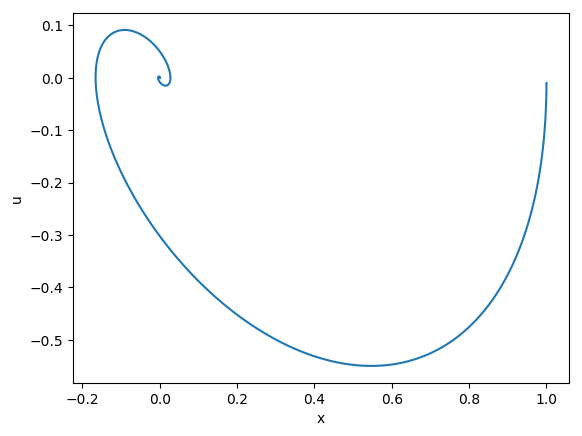

In [122]:
vec = herramientas.metodo_euler_vec(h,list,[1,0]) #Se crea un vector particular para realizar el método de 
#Euler,con condiciones iniciales x(0)=1, x'(0)=1.
listx1 = map(x->x[1],vec) #Guarda  los elementos x[1] de cada elemeno de vec en listx1.
listx2 = map(x->x[2],vec) #Guarda  los elementos x[2] de cada elemeno de vec en listx2.
xlabel("x");ylabel("u")
plot(listx1,listx2) #Se grafica la posición contra la velocidad.
legend()

In [25]:
?herramientas.metodo_euler

documentación del método de Euler


#### Se realiza una comprobación del funcionamiento  del método implícito de Euler

In [84]:
function g(t,x) #Se crea una función que se utilizará en el método de Runge-Kutta.
    return -x
end

g (generic function with 1 method)

In [85]:
herramientas.metodo_implicito_euler(g,1,0,10,0.1)

(Any[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9  …  9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0],Any[1,0.9090909090909091,0.8264462809917354,0.7513148009015777,0.6830134553650706,0.6209213230591552,0.5644739300537774,0.5131581182307068,0.4665073802097334,0.42409761837248494  …  0.00017110616225566146,0.0001555510565960559,0.0001414100514509599,0.00012855459222814537,0.00011686781111649579,0.00010624346465135981,9.658496786487255e-5,8.780451624079322e-5,7.98222874916302e-5,7.2565715901482e-5])

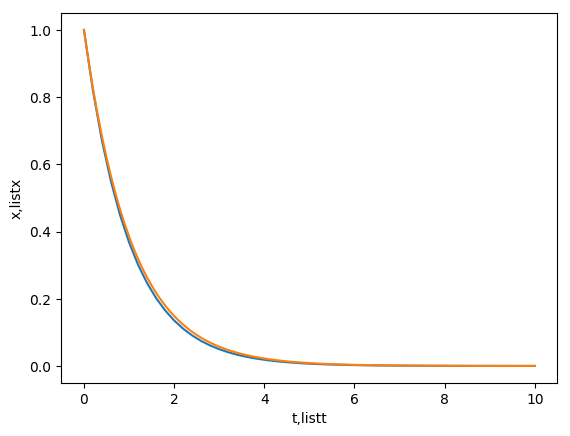

PyObject <matplotlib.text.Text object at 0x7f6369d292d0>

In [89]:
#Se grafica la solución usando el método implícito y también se grafica la solución exacta.
t = []
x = []
for i in 0:50
    push!(t,10*i/50)
    push!(x,exp(-t[i+1]))
end
plot(t,x)
listt,listx = herramientas.metodo_implicito_euler(g,1,0,10,0.1)
plot(listt,listx)
ylabel("x,listx")
xlabel("t,listt")

In [103]:
?herramientas.metodo_implicito_euler

documentación del método implícito de Euler


#### Se realiza una comprobación del funcionamiento  del método explícito de Euler (regla del punto medio)

In [128]:
herramientas.metodo_explicito_regla_punto_medio(g,1,0,10,0.001)

(Any[0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009  …  9.991,9.992,9.993,9.994,9.995,9.996,9.997,9.998,9.999,10.0],Any[1,0.99900000025,0.99800100099975,0.9970030012487502,0.9960059999975014,0.9950099962475039,0.9940149890012564,0.9930209772622551,0.9920279600349928,0.9910359363249578  …  0.004541354725945129,0.004541809121219184,0.004542263562097965,0.004542718048535867,0.004543172580487331,0.004543627157906844,0.004544081780748937,0.004544536448968188,0.00454499116251922,0.004545445921356701])

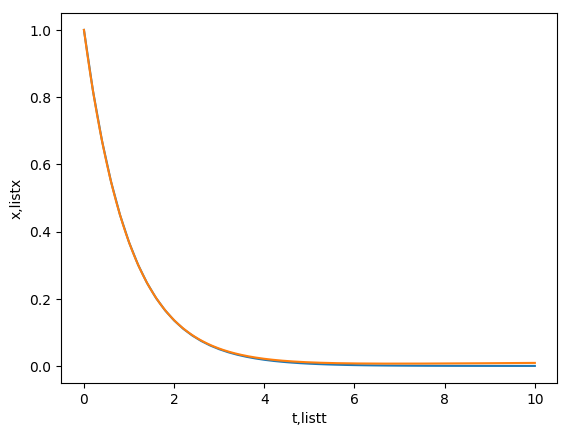

PyObject <matplotlib.text.Text object at 0x7f636a0da090>

In [134]:
t = []
x = []
for i in 0:50
    push!(t,10*i/50)
    push!(x,exp(-t[i+1]))
end
plot(t,x)
listt,listx = herramientas.metodo_explicito_regla_punto_medio(g,1,0,10,0.002)
plot(listt,listx)
ylabel("x,listx")
xlabel("t,listt")

In [137]:
?herramientas.metodo_explicito_regla_punto_medio

documentación del método explícito de Euler (regla del punto medio)


#### Se realiza una comprobación del funcionamiento  del método de Runge-Kutta de orden 4 vectorial

In [124]:
F(x,t) = [x[2],-x[1]-x[2]] #Se define la función asociada al sistema de ecuaciones 
#del oscilador armónico amortiguado.
list1 = 0:0.1:200 #Se crea una lista particular para realizar el método de Runge-Kutta.
herramientas.metodo_runge_kutta_vec(f,list1,[1,0]) #definimos un vector donde usando método de
#Runge Kutta con condiciones iniciales x(0)=1, x'(0)=1,

2001-element Array{Any,1}:
 [1,0]                                            
 [0.9951666666666666,-0.09500416666666665]        
 [0.9813309027604167,-0.18006416803819442]        
 [0.9594809571660794,-0.2553175363026823]         
 [0.9305872361012872,-0.3209819605401623]         
 [0.8955947741173134,-0.37734558893117326]        
 [0.8554166628206643,-0.4247575838822942]         
 [0.8109284086582803,-0.4636189958055038]         
 [0.7629631850024265,-0.49437401200267783]        
 [0.712307938576277,-0.5175016281678618]          
 [0.6597003059404275,-0.5335077814801433]         
 [0.6058262922720123,-0.5429179761622349]         
 [0.551318661965718,-0.5462704247591967]          
 ⋮                                                
 [-3.6492576204057083e-44,-3.796296602846927e-44] 
 [-3.9922835370800507e-44,-3.0705891615815695e-44]
 [-4.2647062644559193e-44,-2.384745645624827e-44] 
 [-4.4706542902855976e-44,-1.7414937374970106e-44]
 [-4.614495289168673e-44,-1.1428965711763116e-44] 
 [-4

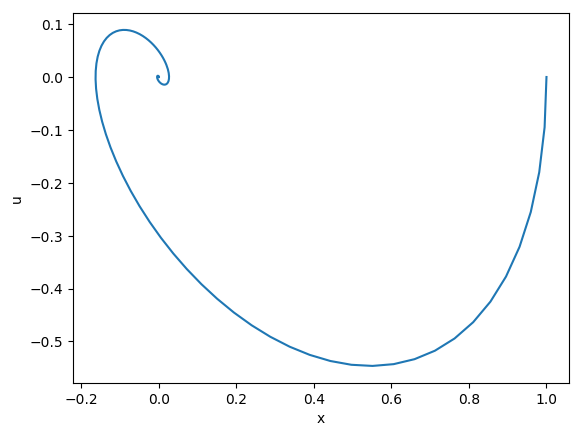

In [125]:
vec1 = herramientas.metodo_runge_kutta_vec(F,list1,[1,0]) #definimos un vector donde usando 
#método de Runge Kutta con condiciones iniciales x(0)=1, x'(0)=1.
listx3 = map(x->x[1],vec1) #Guarda  los elementos x[1] de cada elemeno de vec1 en listx3.
listx4 = map(x->x[2],vec1) #Guarda  los elementos x[2] de cada elemeno de vec1 en listx4.
xlabel("x");ylabel("u")
plot(listx3,listx4) #Se grafica posición contra velocidad usando Runge-Kutta.
legend()

In [30]:
?herramientas.metodo_runge_kutta_vec

documentación del método de Runge-Kutta de orden 4 vectorial
